# 14. AMES HOUSING: EXPLORATIVE DATA ANALYSIS
---

## 1. Introducing the Data
- We are going to work with the training dataset that we saved from the previous chapter
- Our Target Feature Is `SalePrice`

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

ames = pd.read_csv('data/Ames_Housing1_train')
print(ames.shape)
ames.head()

(2344, 80)


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,80.0,10400.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1090.0,1090.0,GasA,TA,Y,SBrkr,1370.0,0.0,0.0,1370.0,0.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,479.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,6,2009,WD,Family,152000.0
1,60,RL,NaN,28698.0,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,2Story,5,5,1967,1967,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,PConc,TA,Gd,Gd,LwQ,249.0,ALQ,764.0,0.0,1013.0,GasA,TA,Y,SBrkr,1160.0,966.0,0.0,2126.0,0.0,1.0,2,1,3,1,TA,7,Min2,0,NaN,Attchd,1967.0,Fin,2.0,538.0,TA,TA,Y,486.0,0.0,0.0,0.0,225.0,0.0,NaN,NaN,NaN,0.0,6,2009,WD,Abnorml,185000.0
2,90,RL,70.0,9842.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1224.0,0.0,0.0,1224.0,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1962.0,Unf,2.0,462.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3,2007,WD,Normal,101800.0
3,90,RL,60.0,7200.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1949,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Fa,N,FuseF,1040.0,0.0,0.0,1040.0,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1956.0,Unf,2.0,420.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6,2009,WD,Normal,90000.0
4,190,RM,63.0,7627.0,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,2fmCon,2Story,4,6,1920,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,Fa,TA,BrkTil,Fa,Po,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Gd,N,SBrkr,1101.0,600.0,0.0,1701.0,0.0,0.0,2,0,4,2,Fa,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0.0,0.0,148.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,10,2009,WD,Normal,94550.0


## 2. Visualizing Continuous Columns
There are 20 continuous columns

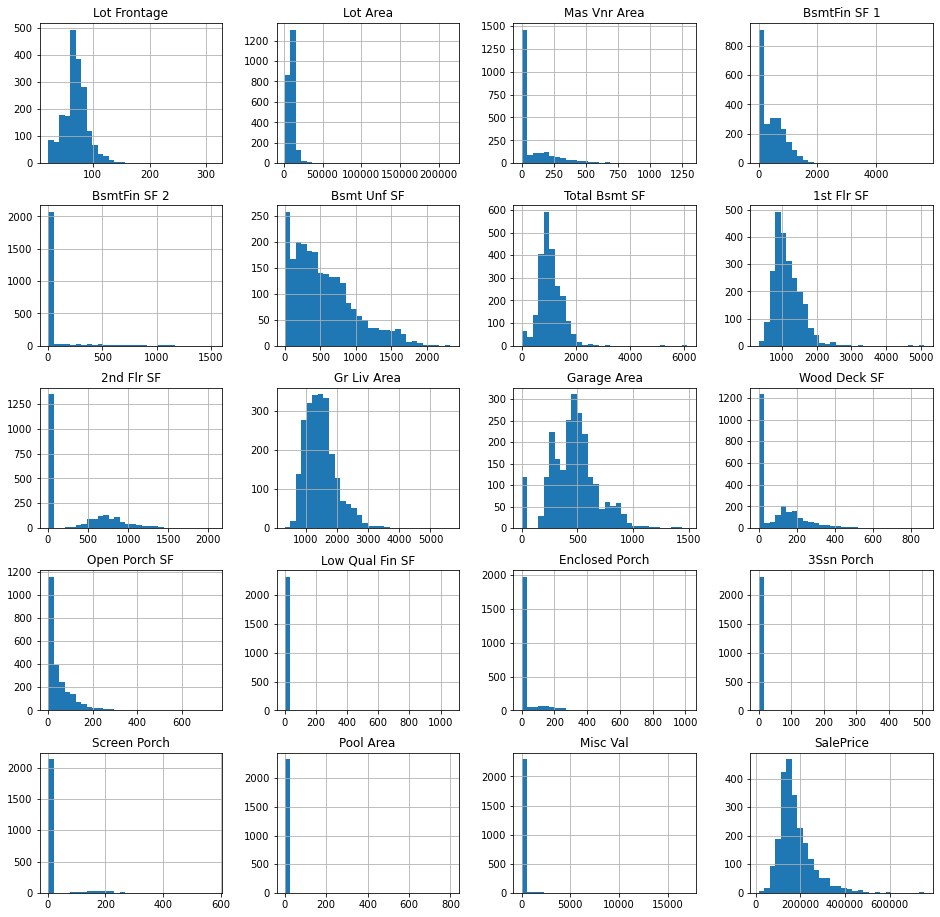

In [2]:
import matplotlib.pyplot as plt

continuous = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
              'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
              'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Low Qual Fin SF', 'Enclosed Porch', 
              '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']
ames[continuous].hist(bins=30, figsize=(16,16))
plt.show()

- The most obvious observation is that the histograms above are all of different data ranges. 
- Most, if not all, of the distributions are skewed to the left

## 3. Visualizing Discrete Columns
There are 14 discrete columns

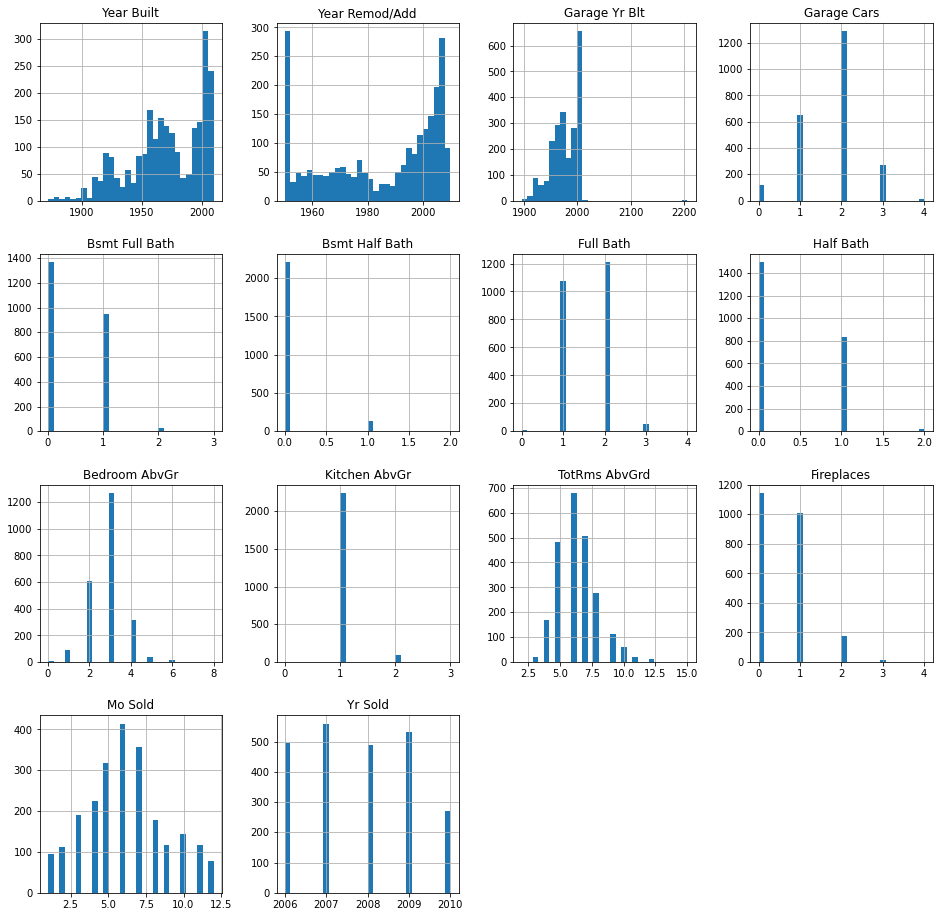

In [3]:
discrete = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Garage Cars', 'Bsmt Full Bath',
           'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
           'TotRms AbvGrd', 'Fireplaces', 'Mo Sold', 'Yr Sold']
ames[discrete].hist(bins=30, figsize=(16,16))
plt.show()

From the distributions above, we can get useful insights about what a typical house in Ames, Iowa looks like and also how the marked behaved over time:
- Most of the houses have at least two car garages
- It's not typical for a house to have a basement bath (full or half)
- Most houses have at least 3 bedrooms above ground
- Nearly all houses have 1 kitchen and none has zero
- There is an almost 50/50 chance that a house is going to have a fireplace
- June is the best month in terms of houses sold, July is second best, and May is third. 
- December is the worst in terms of houses sold, followed by January

There are also a couple issues:
- A garage cannot have been build in 2200 because that's in the future
- We may also want to check out the `Year Remod/Add` and understand why the beginning of the chart looks like that.

## 4. Studying the Correlation with the Target
This task will not be all-inclusive because some of the features have text values and we can't learn anything from them yet. However, after encoding them to numbers, we can come back to this and see whether they add insights to what we have

In [4]:
corr_matrix = ames.corr()
sorted_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
sorted_corr

SalePrice          1.000
Overall Qual       0.795
Gr Liv Area        0.698
Garage Cars        0.644
Garage Area        0.633
Total Bsmt SF      0.612
1st Flr SF         0.607
Year Built         0.545
Full Bath          0.542
Year Remod/Add     0.518
Garage Yr Blt      0.516
Mas Vnr Area       0.491
TotRms AbvGrd      0.475
Fireplaces         0.468
BsmtFin SF 1       0.424
Wood Deck SF       0.333
Lot Frontage       0.329
Open Porch SF      0.298
Bsmt Full Bath     0.287
Half Bath          0.285
2nd Flr SF         0.279
Lot Area           0.261
Bsmt Unf SF        0.164
Bedroom AbvGr      0.149
Screen Porch       0.137
Pool Area          0.079
3Ssn Porch         0.035
Mo Sold            0.031
BsmtFin SF 2       0.027
Low Qual Fin SF   -0.016
Misc Val          -0.018
Bsmt Half Bath    -0.024
Yr Sold           -0.038
MS SubClass       -0.066
Overall Cond      -0.104
Kitchen AbvGr     -0.116
Enclosed Porch    -0.131
Name: SalePrice, dtype: float64

Text(0.5, 0, 'Features')

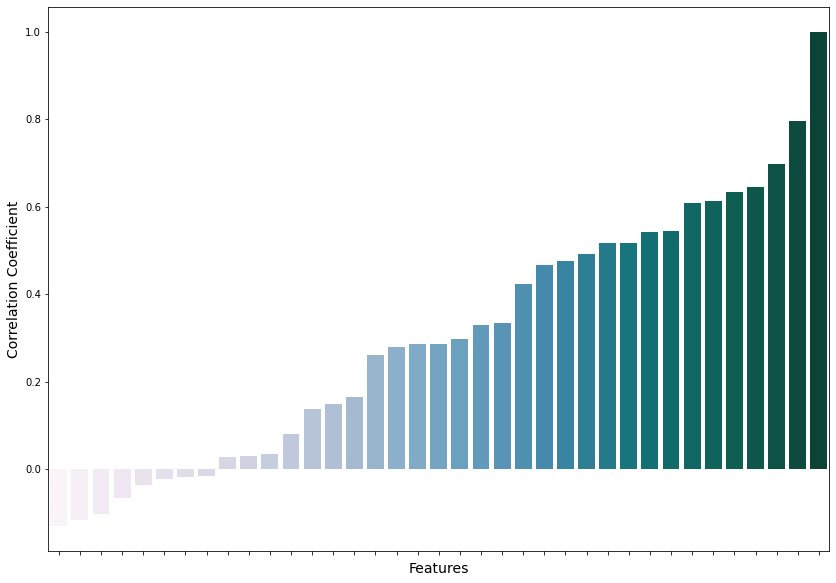

In [5]:
import seaborn as sns

plt.figure(figsize=(14,10))
ax = sns.barplot(x=sorted_corr.index, y=sorted_corr.values, 
                 data=sorted_corr, palette='PuBuGn')
ax.get_xaxis().set_ticklabels([])
plt.ylabel('Correlation Coefficient', size=14)
plt.xlabel('Features', size=14)

## 5. Correlation Heatmap

<AxesSubplot:>

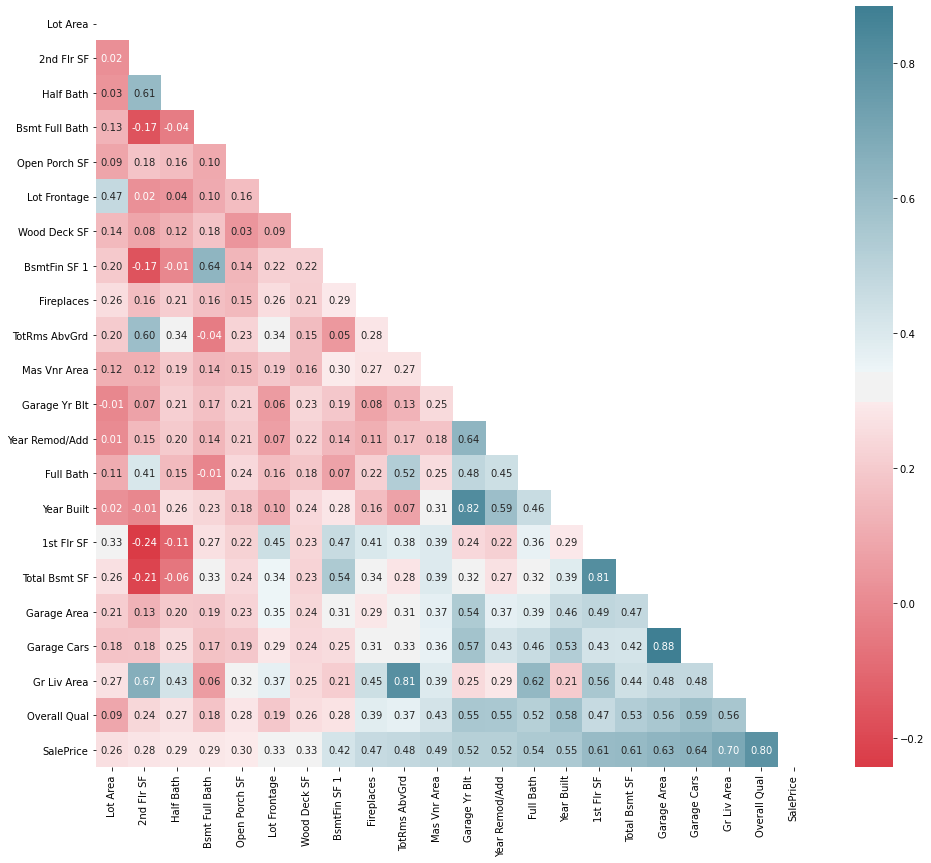

In [6]:
sorted_corr_ = corr_matrix['SalePrice'].sort_values()
strong_corrs = sorted_corr_[sorted_corr_ > 0.2]
corr = ames[strong_corrs.index].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
color = sns.diverging_palette(10, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(corr, mask=mask, cmap=color, annot=True, 
            fmt=".2f", annot_kws={"size": 10})

- It looks like we have a number of features with strong positive correlation with the target
- There are also some feature pairs with high correlation that we might have to deal with later. We can drop one of them

## 6. Missing Values

In [7]:
ames_null_counts = ames.isnull().sum()
ames_null = ames[ames_null_counts[ames_null_counts!=0].index]
null_only = ames_null.isnull().mean().sort_values()
null_only

Total Bsmt SF     4.266e-04
Garage Area       4.266e-04
Bsmt Half Bath    4.266e-04
Bsmt Full Bath    4.266e-04
Bsmt Unf SF       4.266e-04
BsmtFin SF 2      4.266e-04
BsmtFin SF 1      4.266e-04
Garage Cars       4.266e-04
Mas Vnr Area      8.106e-03
Mas Vnr Type      8.106e-03
Bsmt Cond         2.602e-02
Bsmt Qual         2.602e-02
BsmtFin Type 1    2.602e-02
BsmtFin Type 2    2.645e-02
Bsmt Exposure     2.688e-02
Garage Type       5.119e-02
Garage Finish     5.205e-02
Garage Qual       5.205e-02
Garage Cond       5.205e-02
Garage Yr Blt     5.205e-02
Lot Frontage      1.677e-01
Fireplace Qu      4.881e-01
Fence             7.995e-01
Alley             9.309e-01
Misc Feature      9.599e-01
Pool QC           9.949e-01
dtype: float64

Text(0.5, 0, 'Features')

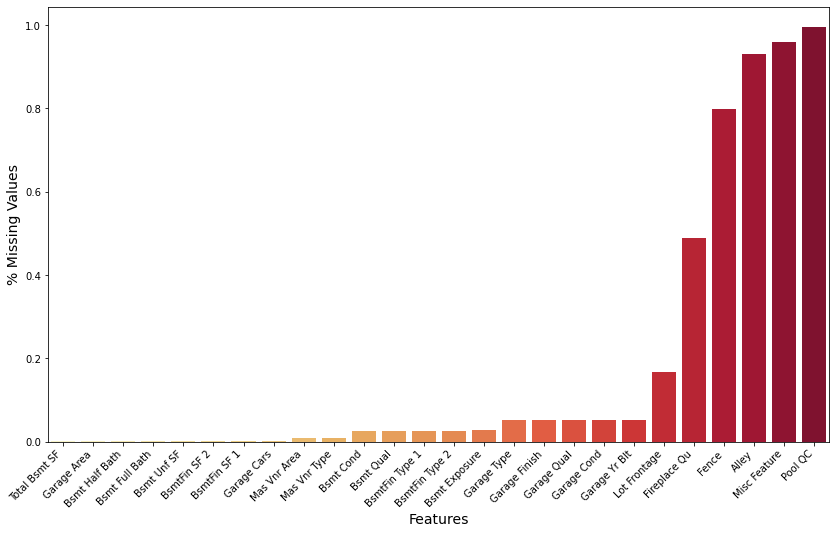

In [8]:
null_plot = pd.DataFrame()
null_plot['feature'] = null_only.index
null_plot['% missing'] = null_only.values

plt.figure(figsize=(14,8))
ax = sns.barplot(x='feature', y='% missing', 
                 data=null_plot, palette='YlOrRd')
plt.xticks(rotation=45, ha='right')
plt.ylabel('% Missing Values', size=14)
plt.xlabel('Features', size=14)

There are columns that are missing almost 100% of the data. That's virtually empty. This won't probably be a problem because:
- The columns missing a high percentage of values are doing so because what they inform us is not available to all entries. For example, not every house has a pool and to assess pool quality, you have to have a pool first. In this case, we can just impute zero
- When we get to fixing these missing values split the columns with missing values into 4 to 5 categories, depending on how much is missing, and we will deal with them differently. 

## 7. Exploring Continuous Data Scale
Let's focus on our continuous data:

In [9]:
(ames[continuous].max() - ames[continuous].min()).sort_values()

Lot Frontage          292.0
3Ssn Porch            508.0
Screen Porch          576.0
Open Porch SF         742.0
Pool Area             800.0
Wood Deck SF          870.0
Enclosed Porch       1012.0
Low Qual Fin SF      1064.0
Mas Vnr Area         1290.0
Garage Area          1488.0
BsmtFin SF 2         1526.0
2nd Flr SF           2065.0
Bsmt Unf SF          2336.0
1st Flr SF           4761.0
Gr Liv Area          5308.0
BsmtFin SF 1         5644.0
Total Bsmt SF        6110.0
Misc Val            17000.0
Lot Area           213945.0
SalePrice          742211.0
dtype: float64

In [10]:
ames_desc = ames[continuous].describe().T
ames_desc['max_min'] = ames[continuous].max() - ames[continuous].min()
ames_desc

,count,mean,std,min,25%,50%,75%,max,max_min
Lot Frontage,1951.0,69.208,23.418,21.0,58.00,68.0,80.00,313.0,292.0
Lot Area,2344.0,10127.858,8050.908,1300.0,7466.50,9356.5,11484.25,215245.0,213945.0
Mas Vnr Area,2325.0,98.540,172.239,0.0,0.00,0.0,160.00,1290.0,1290.0
BsmtFin SF 1,2343.0,442.531,452.223,0.0,0.00,375.0,734.00,5644.0,5644.0
BsmtFin SF 2,2343.0,50.097,170.397,0.0,0.00,0.0,0.00,1526.0,1526.0
Bsmt Unf SF,2343.0,554.394,433.788,0.0,218.00,462.0,795.50,2336.0,2336.0
Total Bsmt SF,2343.0,1047.022,436.567,0.0,784.00,988.0,1288.00,6110.0,6110.0
1st Flr SF,2344.0,1154.814,385.114,334.0,879.75,1082.0,1378.00,5095.0,4761.0
2nd Flr SF,2344.0,333.688,427.141,0.0,0.00,0.0,701.00,2065.0,2065.0
Gr Liv Area,2344.0,1492.860,504.620,334.0,1121.75,1436.5,1734.00,5642.0,5308.0


## 8. Visualizing Outliers

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ames_cont = scaler.fit_transform(ames[continuous])
ames_cont = pd.DataFrame(ames_cont, 
                             columns=continuous)
ames_cont_desc = ames_cont.describe().T
ames_cont_desc['max_min'] = ames_cont[continuous].max() - ames_cont[continuous].min()
ames_cont_desc

,count,mean,std,min,25%,50%,75%,max,max_min
Lot Frontage,1951.0,2.419e-16,1.0,-2.059,-0.479,-0.052,0.461,10.413,12.472
Lot Area,2344.0,6.373e-17,1.0,-1.097,-0.331,-0.096,0.169,25.483,26.580
Mas Vnr Area,2325.0,-2.878e-16,1.0,-0.572,-0.572,-0.572,0.357,6.919,7.491
BsmtFin SF 1,2343.0,-1.896e-16,1.0,-0.979,-0.979,-0.149,0.645,11.504,12.483
BsmtFin SF 2,2343.0,-2.318e-16,1.0,-0.294,-0.294,-0.294,-0.294,8.663,8.957
Bsmt Unf SF,2343.0,1.247e-16,1.0,-1.278,-0.776,-0.213,0.556,4.108,5.386
Total Bsmt SF,2343.0,-5.866e-17,1.0,-2.399,-0.603,-0.135,0.552,11.600,13.999
1st Flr SF,2344.0,2.782e-16,1.0,-2.132,-0.714,-0.189,0.580,10.233,12.365
2nd Flr SF,2344.0,-8.999e-17,1.0,-0.781,-0.781,-0.781,0.860,4.054,4.835
Gr Liv Area,2344.0,1.342e-16,1.0,-2.297,-0.736,-0.112,0.478,8.224,10.521


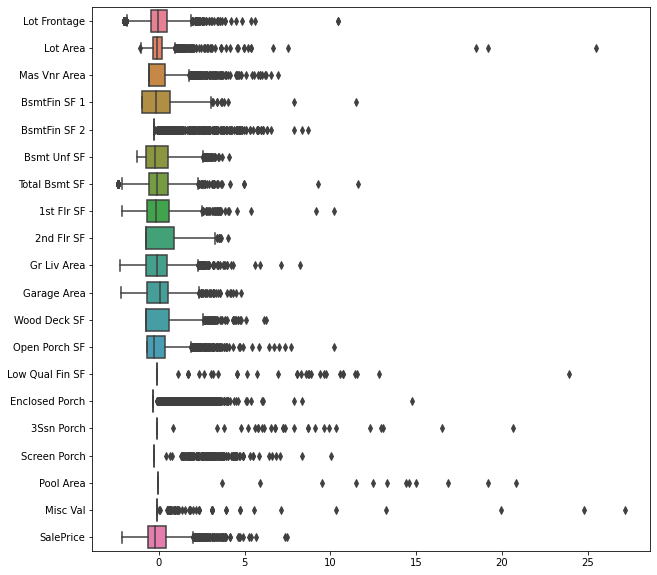

In [12]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=ames_cont, orient="h", palette="husl")

There are a lot of outliers that we might want to do something about. Our target feature, `SalePrice`, also has some and they can be problematic for our model. It's very hard or impossible to predict outliers, that's why they are called that. 

## 9. Capping Outliers in the Target Feature
Let's see how many outliers are in our target feature.

In [13]:
print(ames['SalePrice'].min())
print(ames['SalePrice'].max())
ames['SalePrice'].isnull().sum()

12789.0
755000.0


0

In [14]:
IQR = ames['SalePrice'].quantile(0.75) - ames['SalePrice'].quantile(0.25)
LB = ames['SalePrice'].quantile(0.25) - (IQR*1.5)
UB = ames['SalePrice'].quantile(0.75) + (IQR*1.5)
print(LB, UB)
print((ames['SalePrice']<=LB).sum())
print((ames['SalePrice']>=UB).sum())
print((ames['SalePrice']>=UB).mean())

7500.0 331500.0
0
107
0.045648464163822525


In [15]:
ames['SalesCap'] = ames['SalePrice'].copy()
ames.loc[ames['SalesCap'] > UB, 'SalesCap'] = UB
ames.loc[ames['SalesCap'] < LB, 'SalesCap'] = LB
print((ames['SalesCap'] > UB).sum())
sc = ames['SalesCap'].max()
sc

0


331500.0

- So we managed to reduce the `SalePrice` maximum from 755000, along with any values higher than the `upper_boundary` value, to 331500. 
- We also learned that 107 values are beyond the upper boundary
- Next we are going to do some diagnostic plots to see the effects